In [1]:
import cvxpy as cp
import numpy as np
from analyze_stability import * 
from scipy import linalg


### Parameter Setting:

#### Generator Parameter Setting
- $ T_{v} $ = Time constant of valve
- $ T_{e} $ = Time constant of engine
- $ H $ = Inertia Constant
- $ D $ = Fractional Constant

- $ M $ = $ 2\sum_i H_{i}$ 


In [2]:
Ts = 0.5*10**-4
wpu = 1.0;
Wmax = 1.02;

# Generator Parameter
Pgen = np.array([1, 1, 1])
droop = 0.05
Tv = np.array([0.5, 1.0, 1.0])
Te = np.array([0.05, 0.1, 0.1])
H = np.array([1.587, 2.5, 2.5])
D = 0.01
gen_dict = {'Sbase':150, 'Pgen':Pgen, 'droop':droop,
            'Tv':Tv, 'Te':Te, 'H':H, 'D':D}

# Control Parameter
con_dict = {'kp1': 8,
            'ki1': 2.5,
            'ki2': 5,
            'kc1' : 0.1,
            'Tl1' : 2.4
           }


### Generate System Matrix

In [3]:
# Ngen  number of generator
# Nval  number of variables for one generator
Ts = 0.5*10**-4
error_mat = np.array([0.0001, 0, -0.0001])
scenario = 'nudge'
load_pattern = [90,110,110, 110]
case_dict = {'Ngen':3, 'Nval': cal_Nvariable(scenario), 'Ts': 0.5*10**-4, 'Ttotal': 400,
            'wpu':1.0, 'Wmax': 1.02, 'error': error_mat, 'input_flag': True, 'load_pattern': load_pattern,
            'Tsamp':1/1000}


A = generate_Amat(gen_dict, con_dict, case_dict, scenario)
B = generate_Bmat(gen_dict, con_dict, case_dict)

### Analyze Eigen Value

In [12]:
eig,left_eig_v,right_eig_v = linalg.eig(A, left= True, right = True)

(-3.0, 3.0)

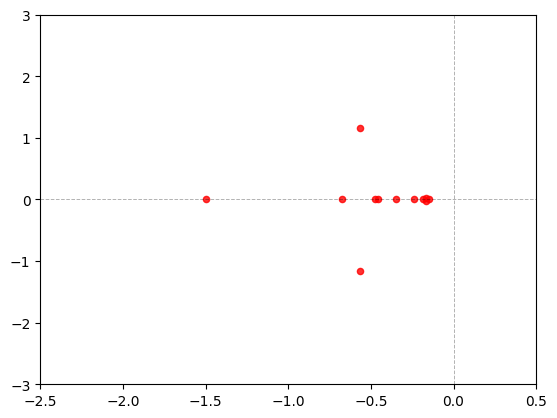

In [13]:
import matplotlib.pyplot as plt
plt.axvline(x=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')
plt.axhline(y=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')
x = eig.real
y = eig.imag
plt.scatter(x,y, s = 20, c = 'r', alpha = 0.8)
plt.xlim([-2.5, 0.5])
plt.ylim([ -3, 3])


Simulation Time: 84.70141196250916 secs
Draw the Frequency Plot
Draw the Active Power Plot


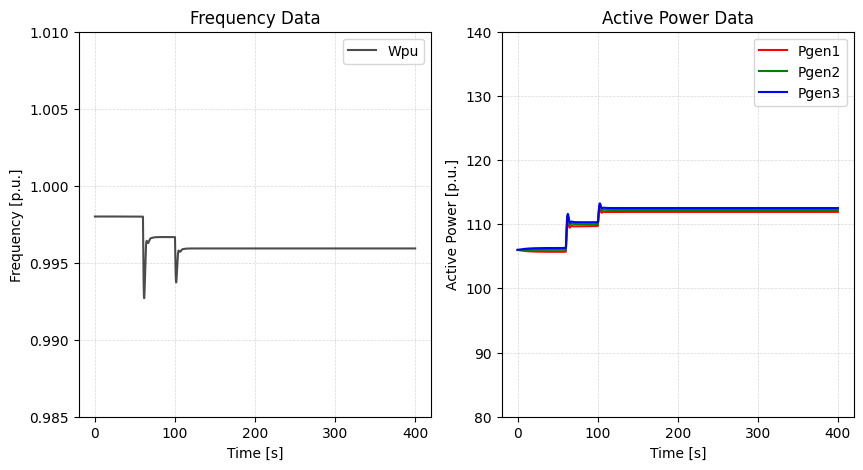

Lyapunov Simulation Time: 12.65299940109253 secs


In [14]:
scenario = 'droop'
case_dict['Nval'] = cal_Nvariable(scenario)
X_droop, U = run_timeseries(gen_dict, con_dict, case_dict, 'droop')

#Update Plot
draw_graph(X_droop, gen_dict, case_dict, scenario)

A matrix change from droop to secondPI
Simulation Time: 87.7750232219696 secs
Draw the Frequency Plot
Draw the Wref Plot
Draw the Active Power Plot


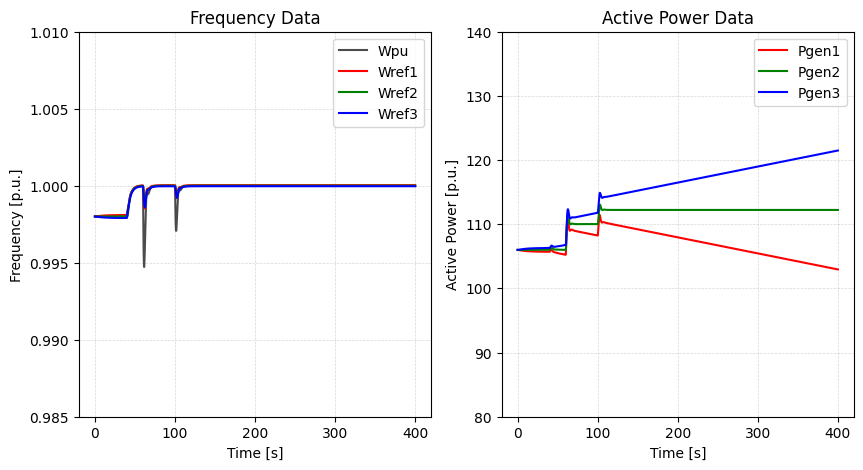

Lyapunov Simulation Time: 22.756556034088135 secs


In [15]:
scenario = 'secondPI'
case_dict['Nval'] = cal_Nvariable(scenario)
X_secPI, U = run_timeseries(gen_dict, con_dict, case_dict, 'secondPI')

#Update Plot
draw_graph(X_secPI, gen_dict, case_dict, 'secondPI')

A matrix change from droop to nudge
Simulation Time: 260.6139163970947 secs
Draw the Frequency Plot
Draw the Wref Plot
Draw the Active Power Plot


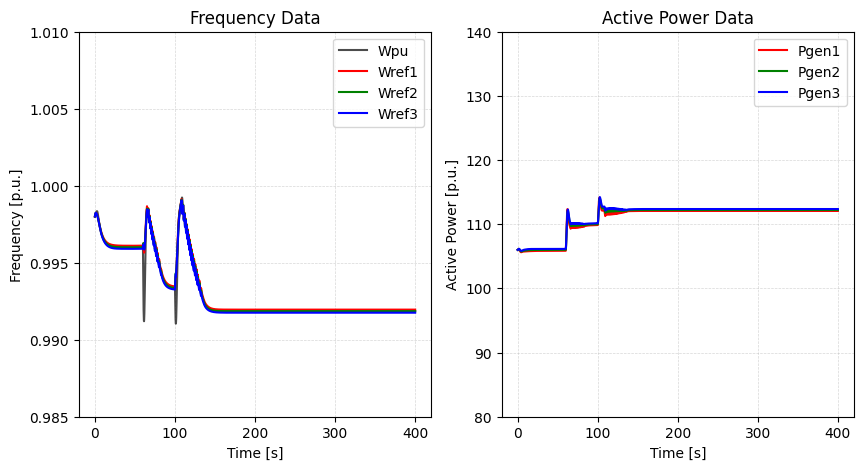

Lyapunov Simulation Time: 21.240521907806396 secs


In [22]:
scenario = 'nudge'
case_dict['Nval'] = cal_Nvariable(scenario)
X_nudge, U = run_timeseries(gen_dict, con_dict, case_dict, 'nudge')
draw_graph(X_nudge, gen_dict, case_dict, 'nudge')

A matrix change from droop to nudge
Simulation Time: 337.56505370140076 secs
Draw the Frequency Plot
Draw the Wref Plot
Draw the Active Power Plot


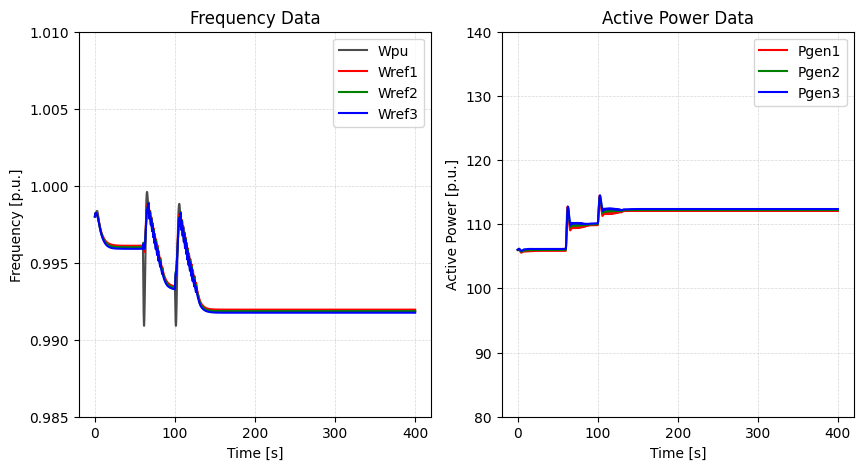

Lyapunov Simulation Time: 23.495917320251465 secs


Draw the Frequency Plot
Draw the Wref Plot
Draw the Active Power Plot


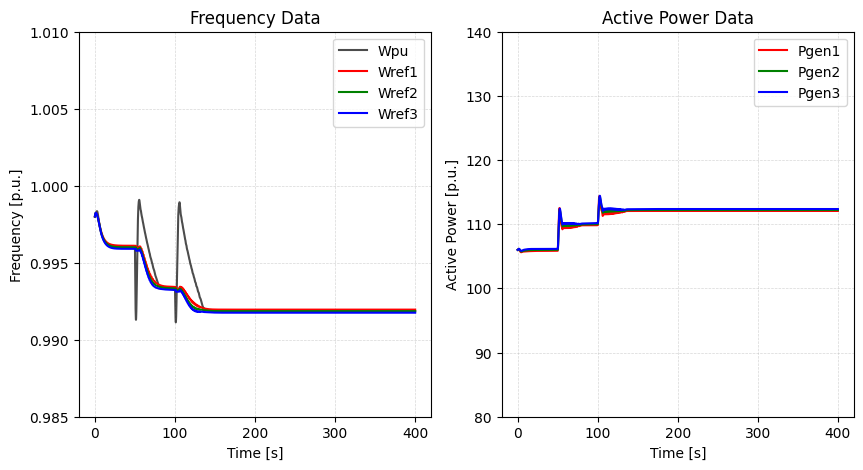

Lyapunov Simulation Time: 22.23352837562561 secs


In [4]:
# Control Parameter
con_dict = {'kp1': 8.0,
            'ki1': 2.5,
            'ki2': 5,
            'kc1' : 0.1,
            'Tl1' : 2.4
           }

scenario = 'nudge'
case_dict['Nval'] = cal_Nvariable(scenario)
X_nudge, U = run_timeseries(gen_dict, con_dict, case_dict, 'nudge')
draw_graph(X_nudge, gen_dict, case_dict, 'nudge')